In [2]:
from copy import copy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [3]:
dfs = []
for w in ["win", "wfn", "wpgs", ""]:
    for problem in ["I_13_12", "I_6_2", "II_24_17", "I_9_18", "II_6_15a"]:
        for seed in range(5):
            for opt in ["adam", "gaussian", "cmaes"]:
                try:
                    w_text = f"{w}_" if len(w) > 0 else ""
                    tmp_df = pd.read_csv(f"../results/ga_feynman_{problem}_{opt}_{w_text}{seed}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["w"] = w if len(w) > 0 else "no w"
                    tmp_df["opt"] = opt
                    tmp_df["problem"] = problem
                    tmp_df["total_time"] = tmp_df["time"].cumsum().astype(int)
                    tmp_df["data_points"] = tmp_df["iteration"] * (1000 if opt == "gaussian" else 4200)
                    dfs.append(tmp_df)
                except FileNotFoundError:
                    pass
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,test_accuracy,time,seed,w,opt,problem,total_time,data_points
0,0.0,0.203571,0.255384,0.000000,0,win,adam,I_13_12,0,0.0
1,1.0,0.259431,0.255384,23.476238,0,win,adam,I_13_12,23,4200.0
2,2.0,0.250075,0.255384,26.278062,0,win,adam,I_13_12,49,8400.0
3,3.0,0.308474,0.255384,27.069353,0,win,adam,I_13_12,76,12600.0
4,4.0,0.251082,0.255384,25.620143,0,win,adam,I_13_12,102,16800.0


In [4]:
df1 = copy(df)
df2 = copy(df)
df1 = df.rename(columns={'test_accuracy': 'accuracy'})
df2 = df.rename(columns={'max_fitness': 'accuracy'})
df1 = df1.drop(columns=['max_fitness'])
df2 = df2.drop(columns=['test_accuracy'])
df1['when'] = "test"
df2['when'] = "train"
df = pd.concat([df1, df2], ignore_index=True)
df

,iteration,accuracy,time,seed,w,opt,problem,total_time,data_points,when
0,0.0,0.255384,0.000000,0,win,adam,I_13_12,0,0.0,test
1,1.0,0.255384,23.476238,0,win,adam,I_13_12,23,4200.0,test
2,2.0,0.255384,26.278062,0,win,adam,I_13_12,49,8400.0,test
3,3.0,0.255384,27.069353,0,win,adam,I_13_12,76,12600.0,test
4,4.0,0.255384,25.620143,0,win,adam,I_13_12,102,16800.0,test
...,...,...,...,...,...,...,...,...,...,...
382795,1495.0,0.874168,3.425028,4,no w,gaussian,II_6_15a,6753,1495000.0,train
382796,1496.0,0.891945,3.565395,4,no w,gaussian,II_6_15a,6757,1496000.0,train
382797,1497.0,0.898737,3.460499,4,no w,gaussian,II_6_15a,6760,1497000.0,train
382798,1498.0,0.900222,3.459804,4,no w,gaussian,II_6_15a,6764,1498000.0,train


In [5]:
max_iter = df.groupby(["w", "opt", "seed"])["iteration"].transform("max")
final_df = df[df["iteration"] == max_iter]
final_df

,iteration,accuracy,time,seed,w,opt,problem,total_time,data_points,when
356,356.0,0.990464,26.146104,0,win,adam,I_13_12,9189,1495200.0,test
1856,1499.0,0.712631,14.942433,0,win,gaussian,I_13_12,21790,1499000.0,test
2213,356.0,0.737255,19.768227,0,win,cmaes,I_13_12,6805,1495200.0,test
2570,356.0,0.930036,24.780019,1,win,adam,I_13_12,9185,1495200.0,test
4070,1499.0,0.889132,14.612429,1,win,gaussian,I_13_12,21835,1499000.0,test
...,...,...,...,...,...,...,...,...,...,...
376799,1499.0,0.881473,4.446123,0,no w,gaussian,II_6_15a,6792,1499000.0,train
378299,1499.0,0.761902,3.247098,1,no w,gaussian,II_6_15a,6777,1499000.0,train
379799,1499.0,0.632249,2.677462,2,no w,gaussian,II_6_15a,6682,1499000.0,train
381299,1499.0,0.832149,3.793018,3,no w,gaussian,II_6_15a,6792,1499000.0,train


In [6]:
reopt_dfs = []
for w in ["win", "wfn", "wpgs"]:
    for problem in ["I_13_12", "I_6_2", "II_24_17", "I_9_18", "II_6_15a"]:
        for seed in range(5):
            for reopt in ["adam", "cmaes"]:
                for opt in ["adam", "gaussian", "cmaes", "none"]:
                    try:
                        tmp_df = pd.read_csv(f"../results/ga_feynman_{problem}_{opt}_{w}_reopt-{reopt}_{seed}.csv")
                        tmp_df["seed"] = seed
                        tmp_df["w"] = w if len(w) > 0 else "no w"
                        tmp_df["opt"] = opt
                        tmp_df["reopt"] = reopt
                        tmp_df["problem"] = problem
                        reopt_dfs.append(tmp_df)
                    except FileNotFoundError:
                        pass
reopt_df = pd.concat(reopt_dfs, ignore_index=True)
reopt_df["test_increase"] = reopt_df["test_accuracy"] - reopt_df["previous_test_accuracy"]
reopt_df["train_increase"] = reopt_df["max_fitness"] - reopt_df["previous_max_fitness"]
reopt_df.head()

,iteration,time,max_fitness,test_accuracy,previous_max_fitness,previous_test_accuracy,equation,seed,w,opt,reopt,problem,test_increase,train_increase
0,0,1017.318291,0.990047,0.990305,0.990384,0.990661,o0 = <lambda>((-0.45*sin(0.59*(-1.49*(-0.31*i2...,0,win,adam,adam,I_13_12,-0.000356,-0.000337
1,0,1005.935762,0.766979,0.762723,0.716266,0.713004,o0 = <lambda>((-1.46*(-0.29*i3+1.28*sqrt(-1.58...,0,win,gaussian,adam,I_13_12,0.049718,0.050714
2,0,1217.213360,0.734573,0.730294,0.737399,0.732833,o0 = <lambda>((0.55*(0.74*i1*-0.40*i4)*0.55*(0...,0,win,cmaes,adam,I_13_12,-0.002539,-0.002826
3,0,662.851450,0.856022,0.851891,0.833616,0.829008,o0 = <lambda>((0.93*(0.93*(0.96*log(0.99*(2.19...,0,win,none,adam,I_13_12,0.022883,0.022406
4,0,12922.161524,0.990418,0.990728,0.990384,0.990661,o0 = <lambda>((-0.45*sin(0.60*(-1.50*(-0.31*i2...,0,win,adam,cmaes,I_13_12,0.000067,0.000034


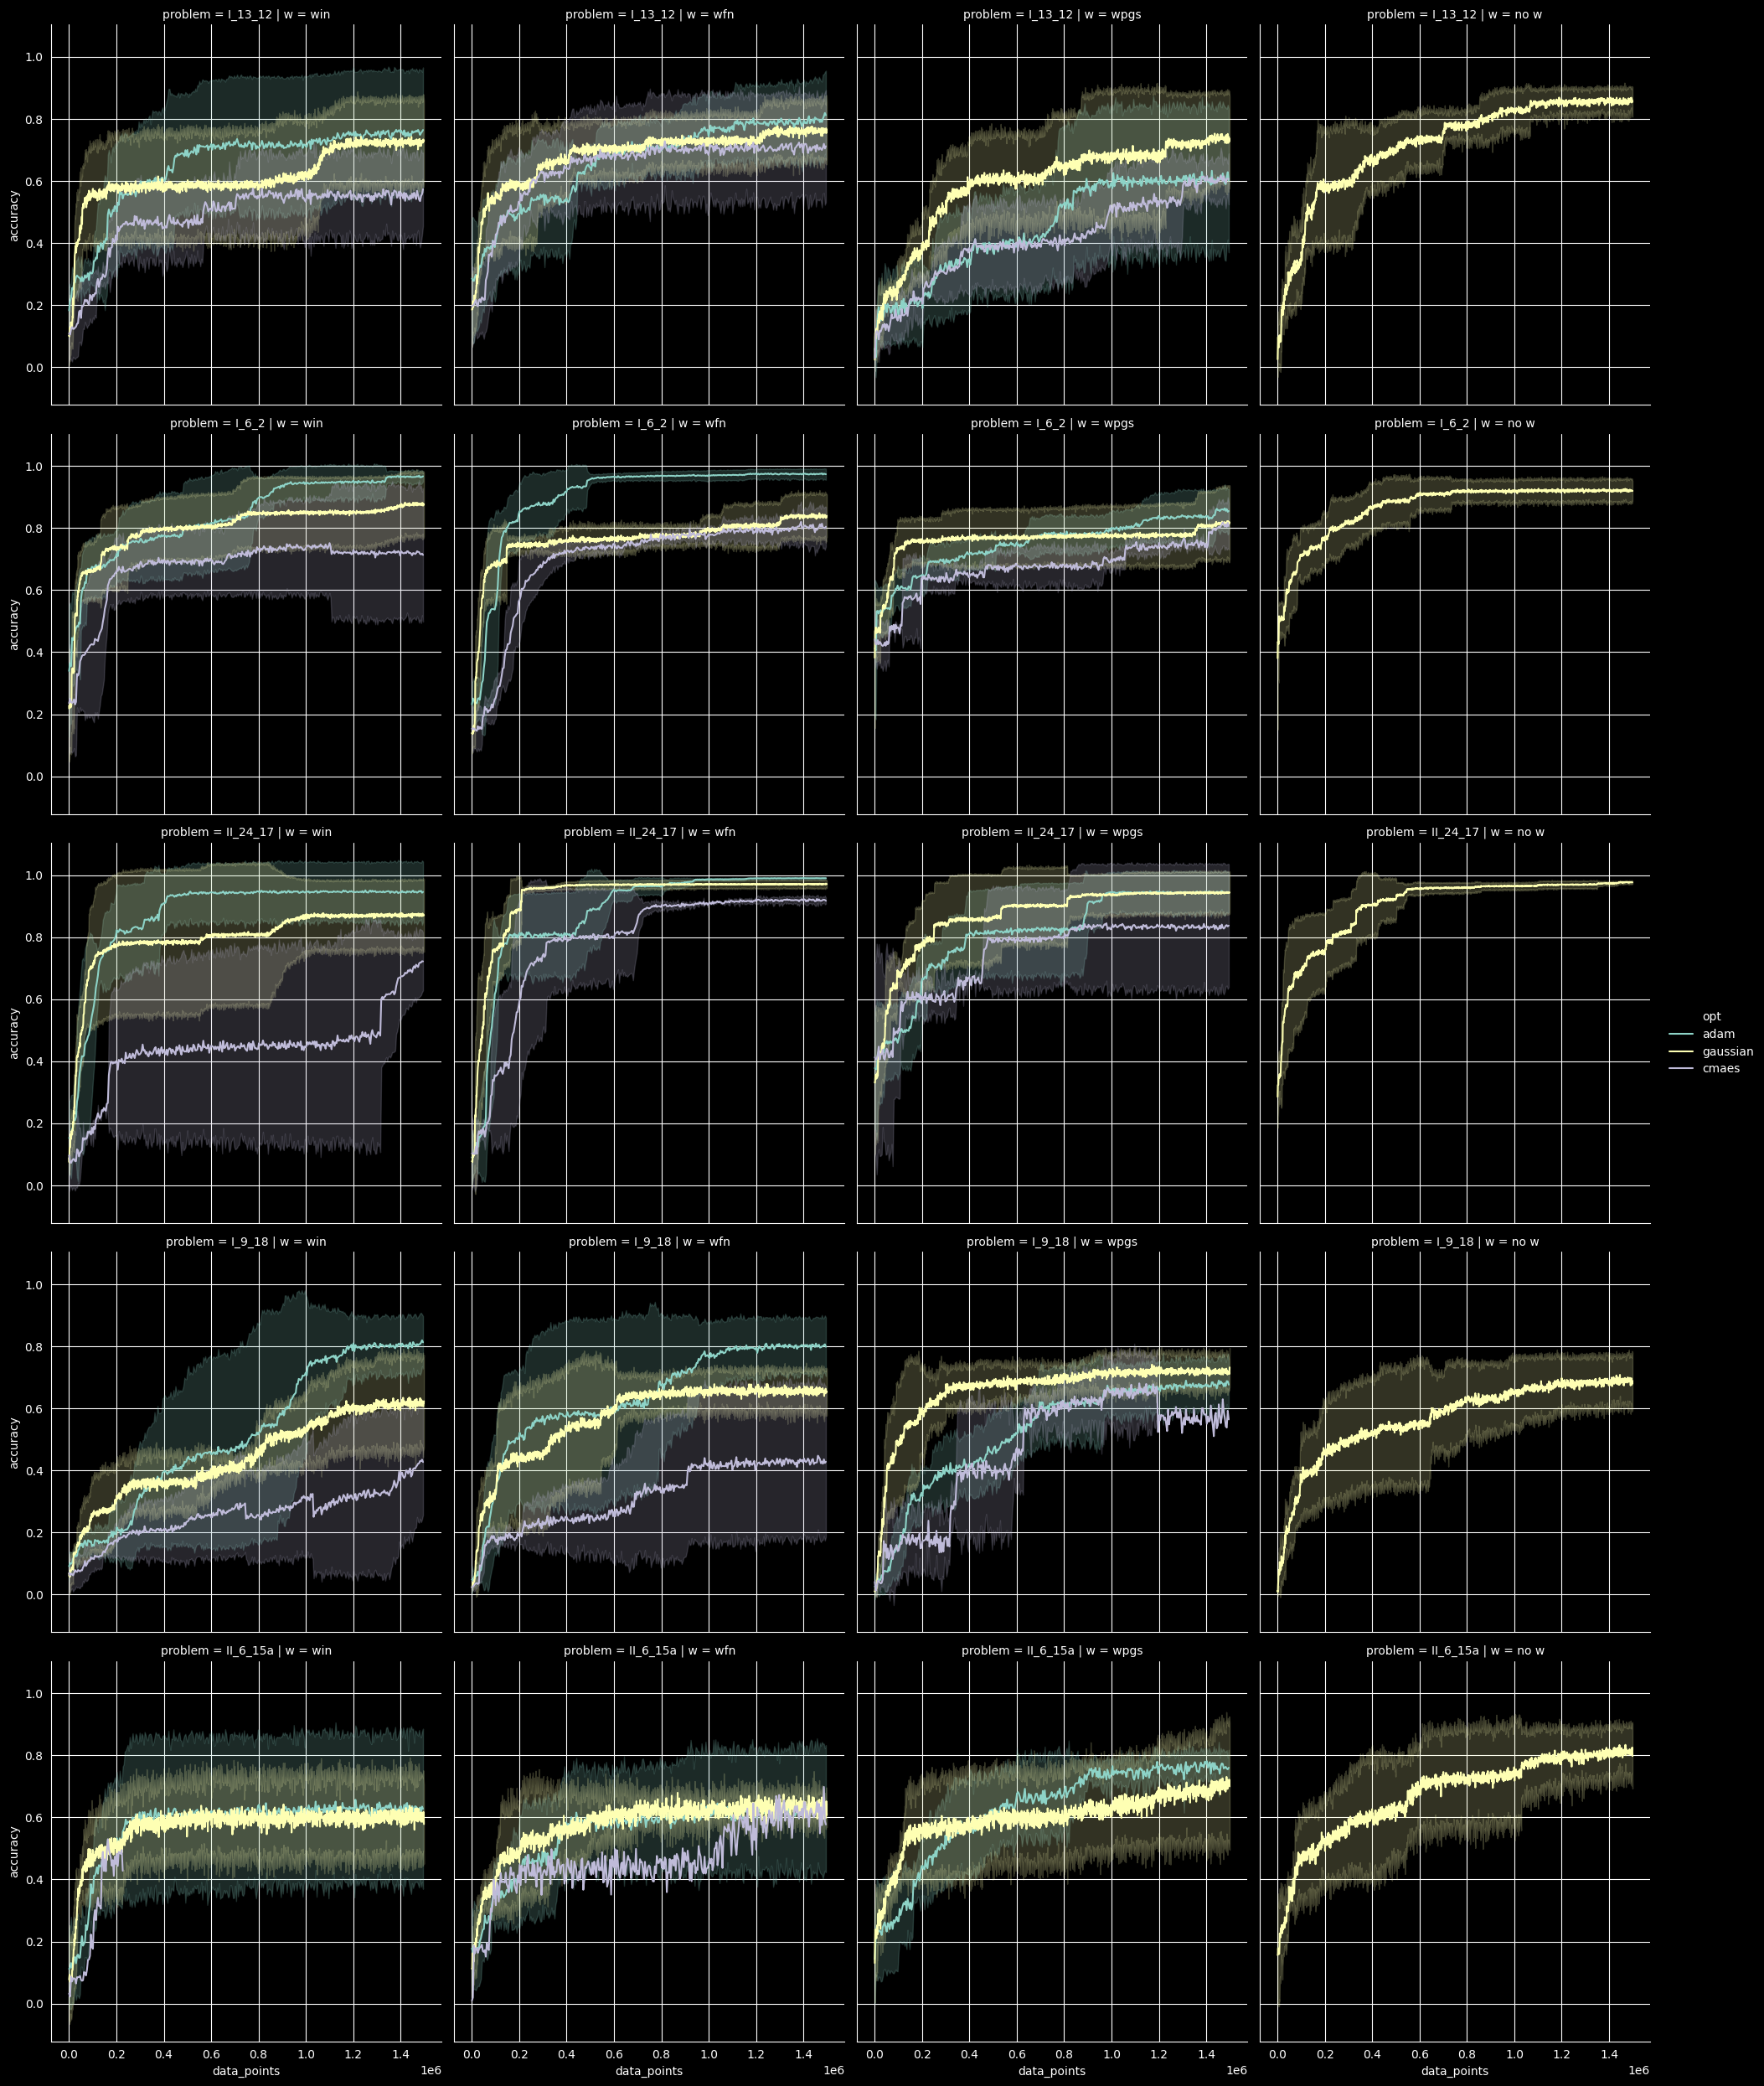

In [7]:
sns.relplot(data=df[df["when"] == "train"], x="data_points", y="accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line")
plt.show()

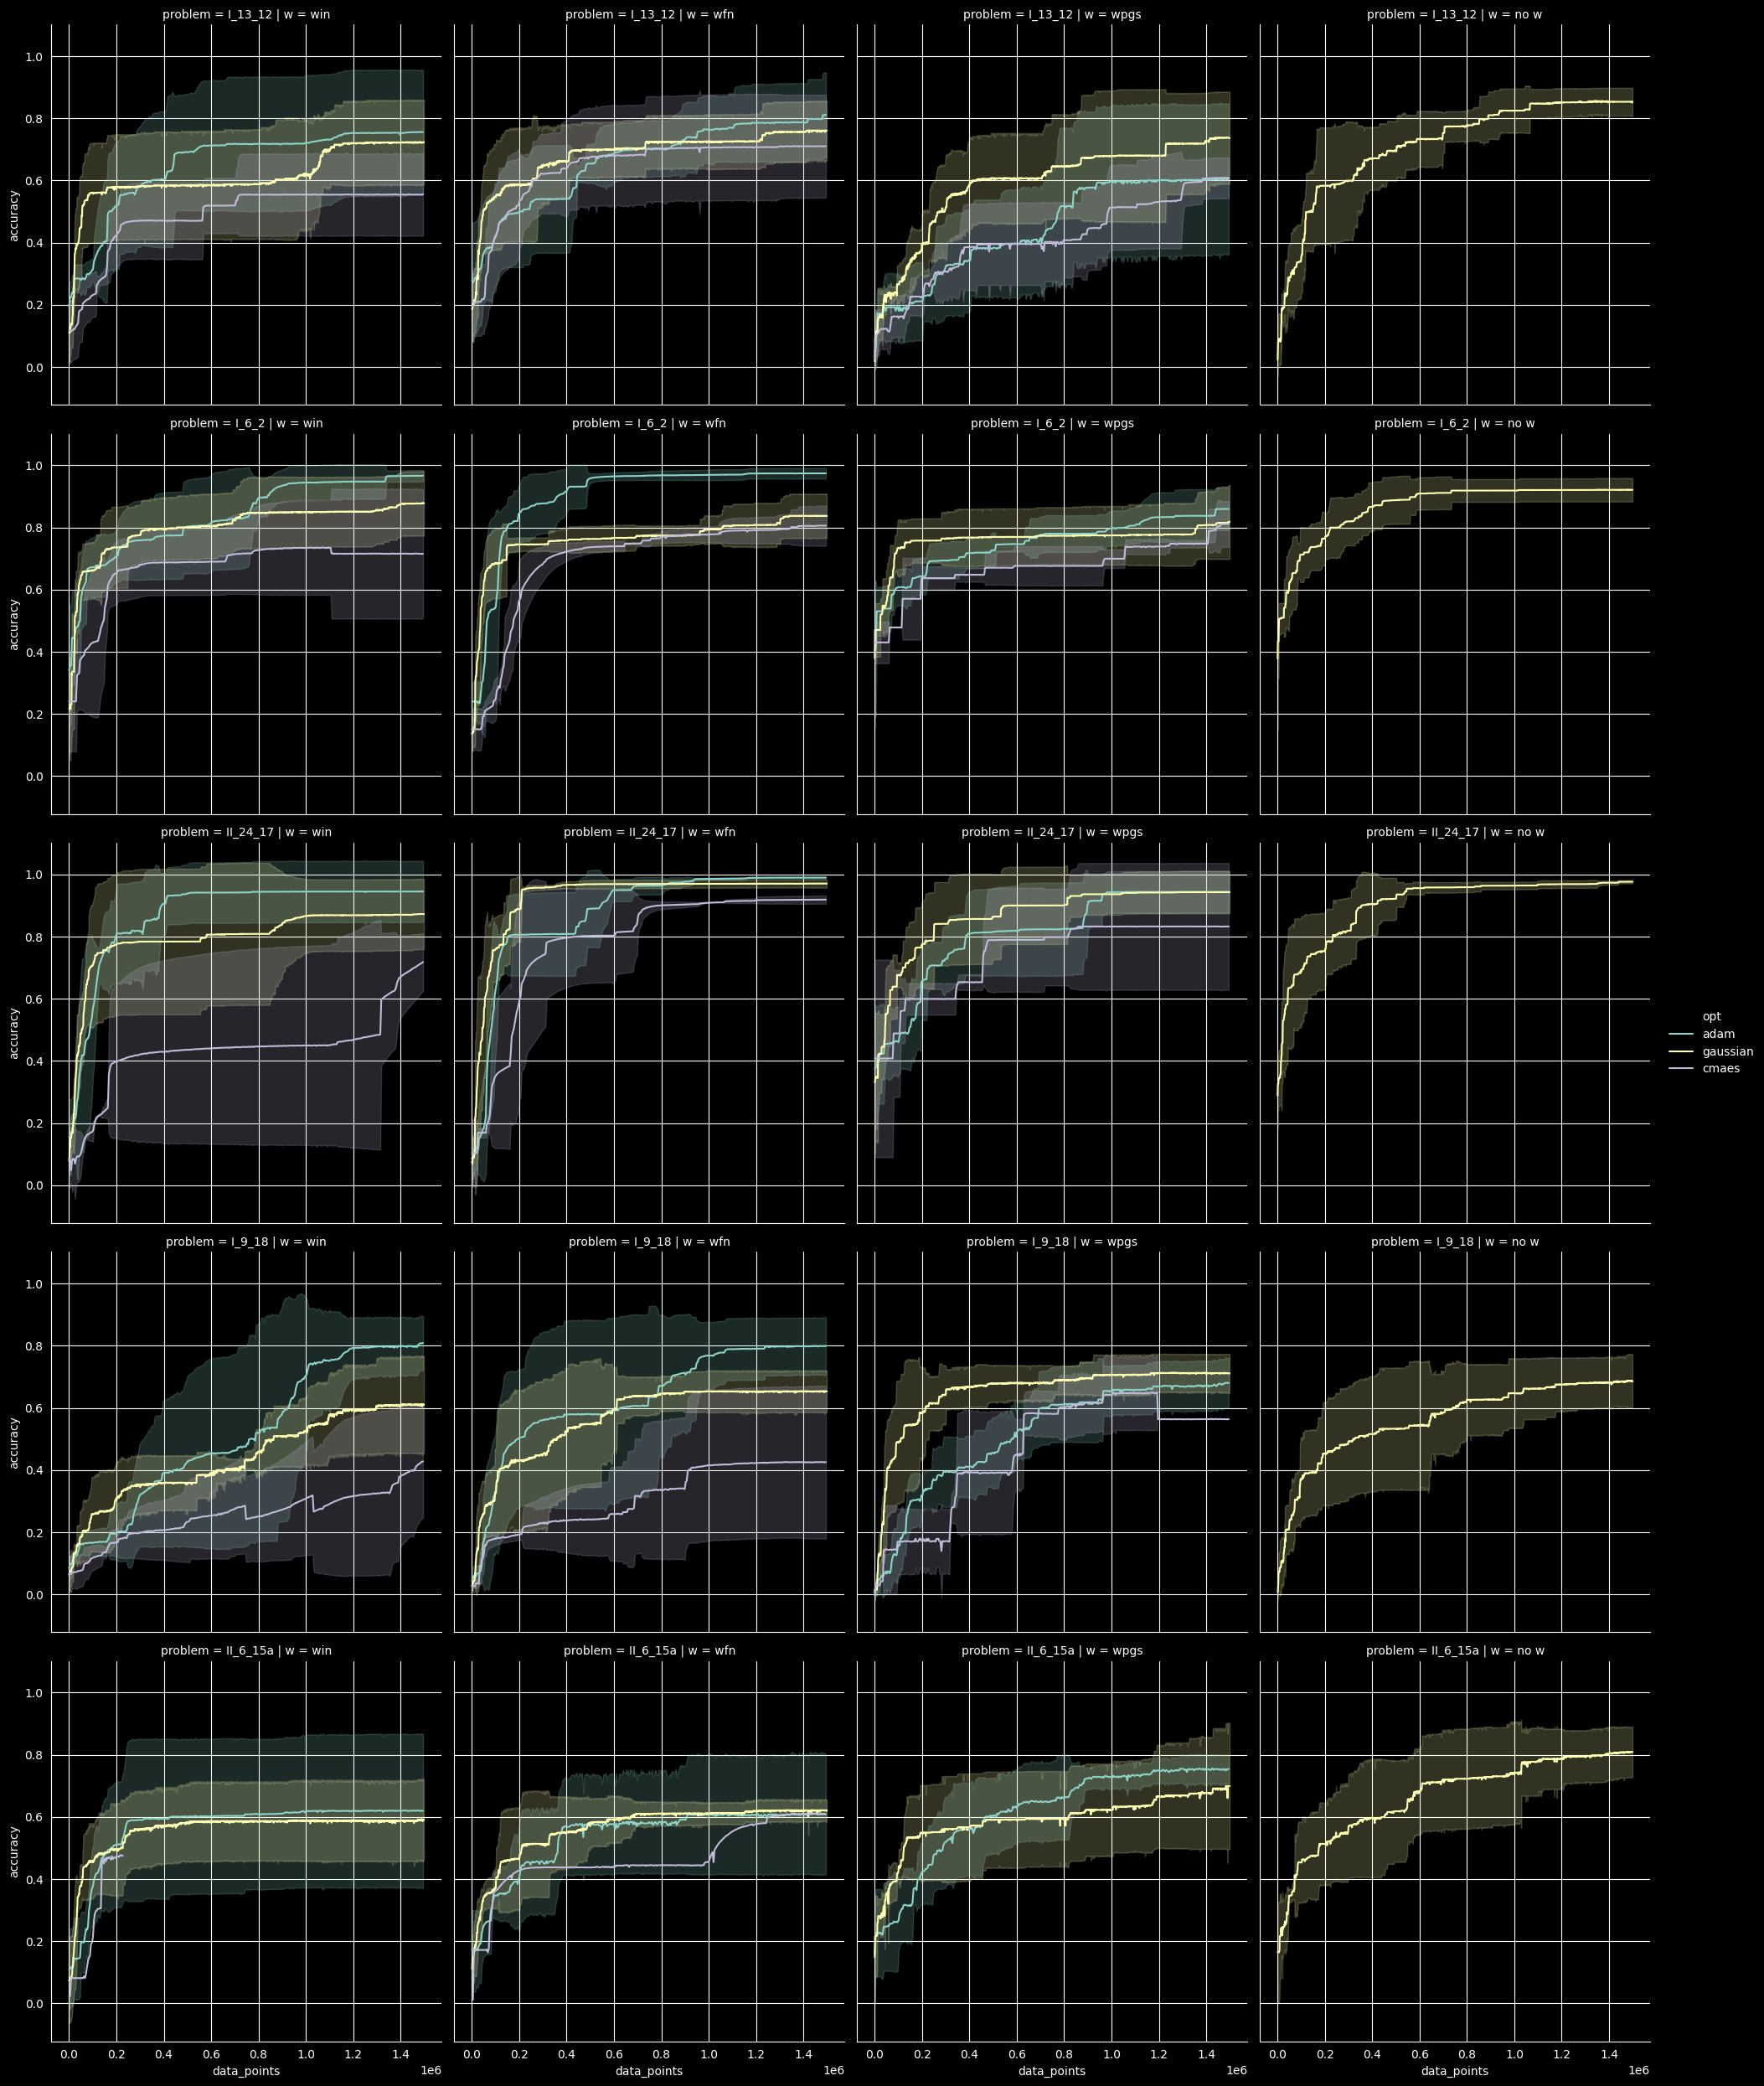

In [8]:
sns.relplot(data=df[df["when"] == "test"], x="data_points", y="accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line")
plt.show()

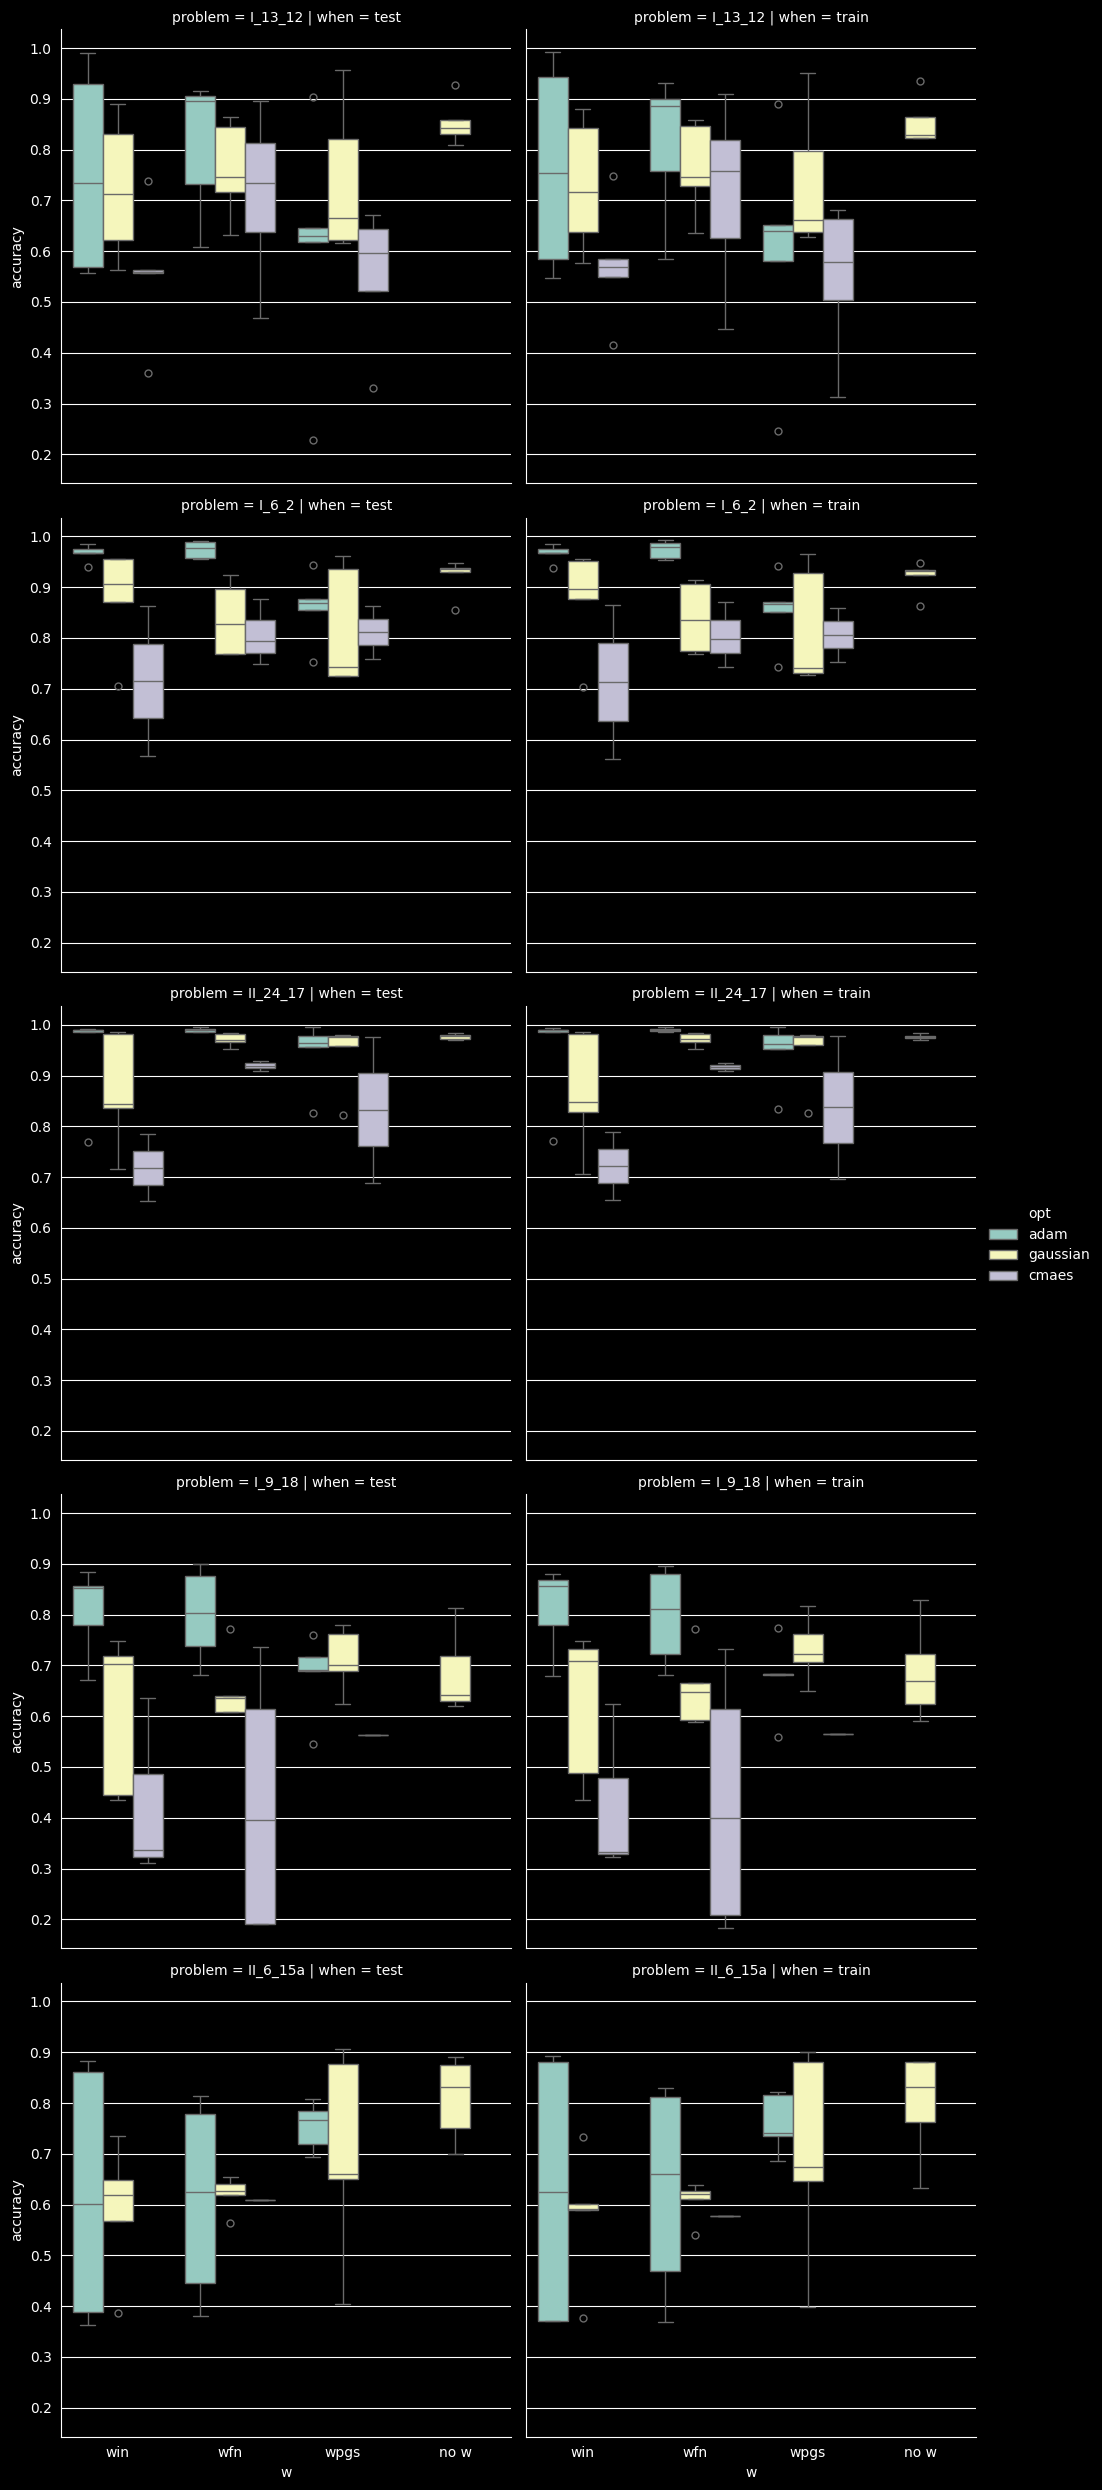

In [9]:
sns.catplot(x="w", y="accuracy", hue="opt", data=final_df, col="when", row="problem", kind="box")
plt.show()

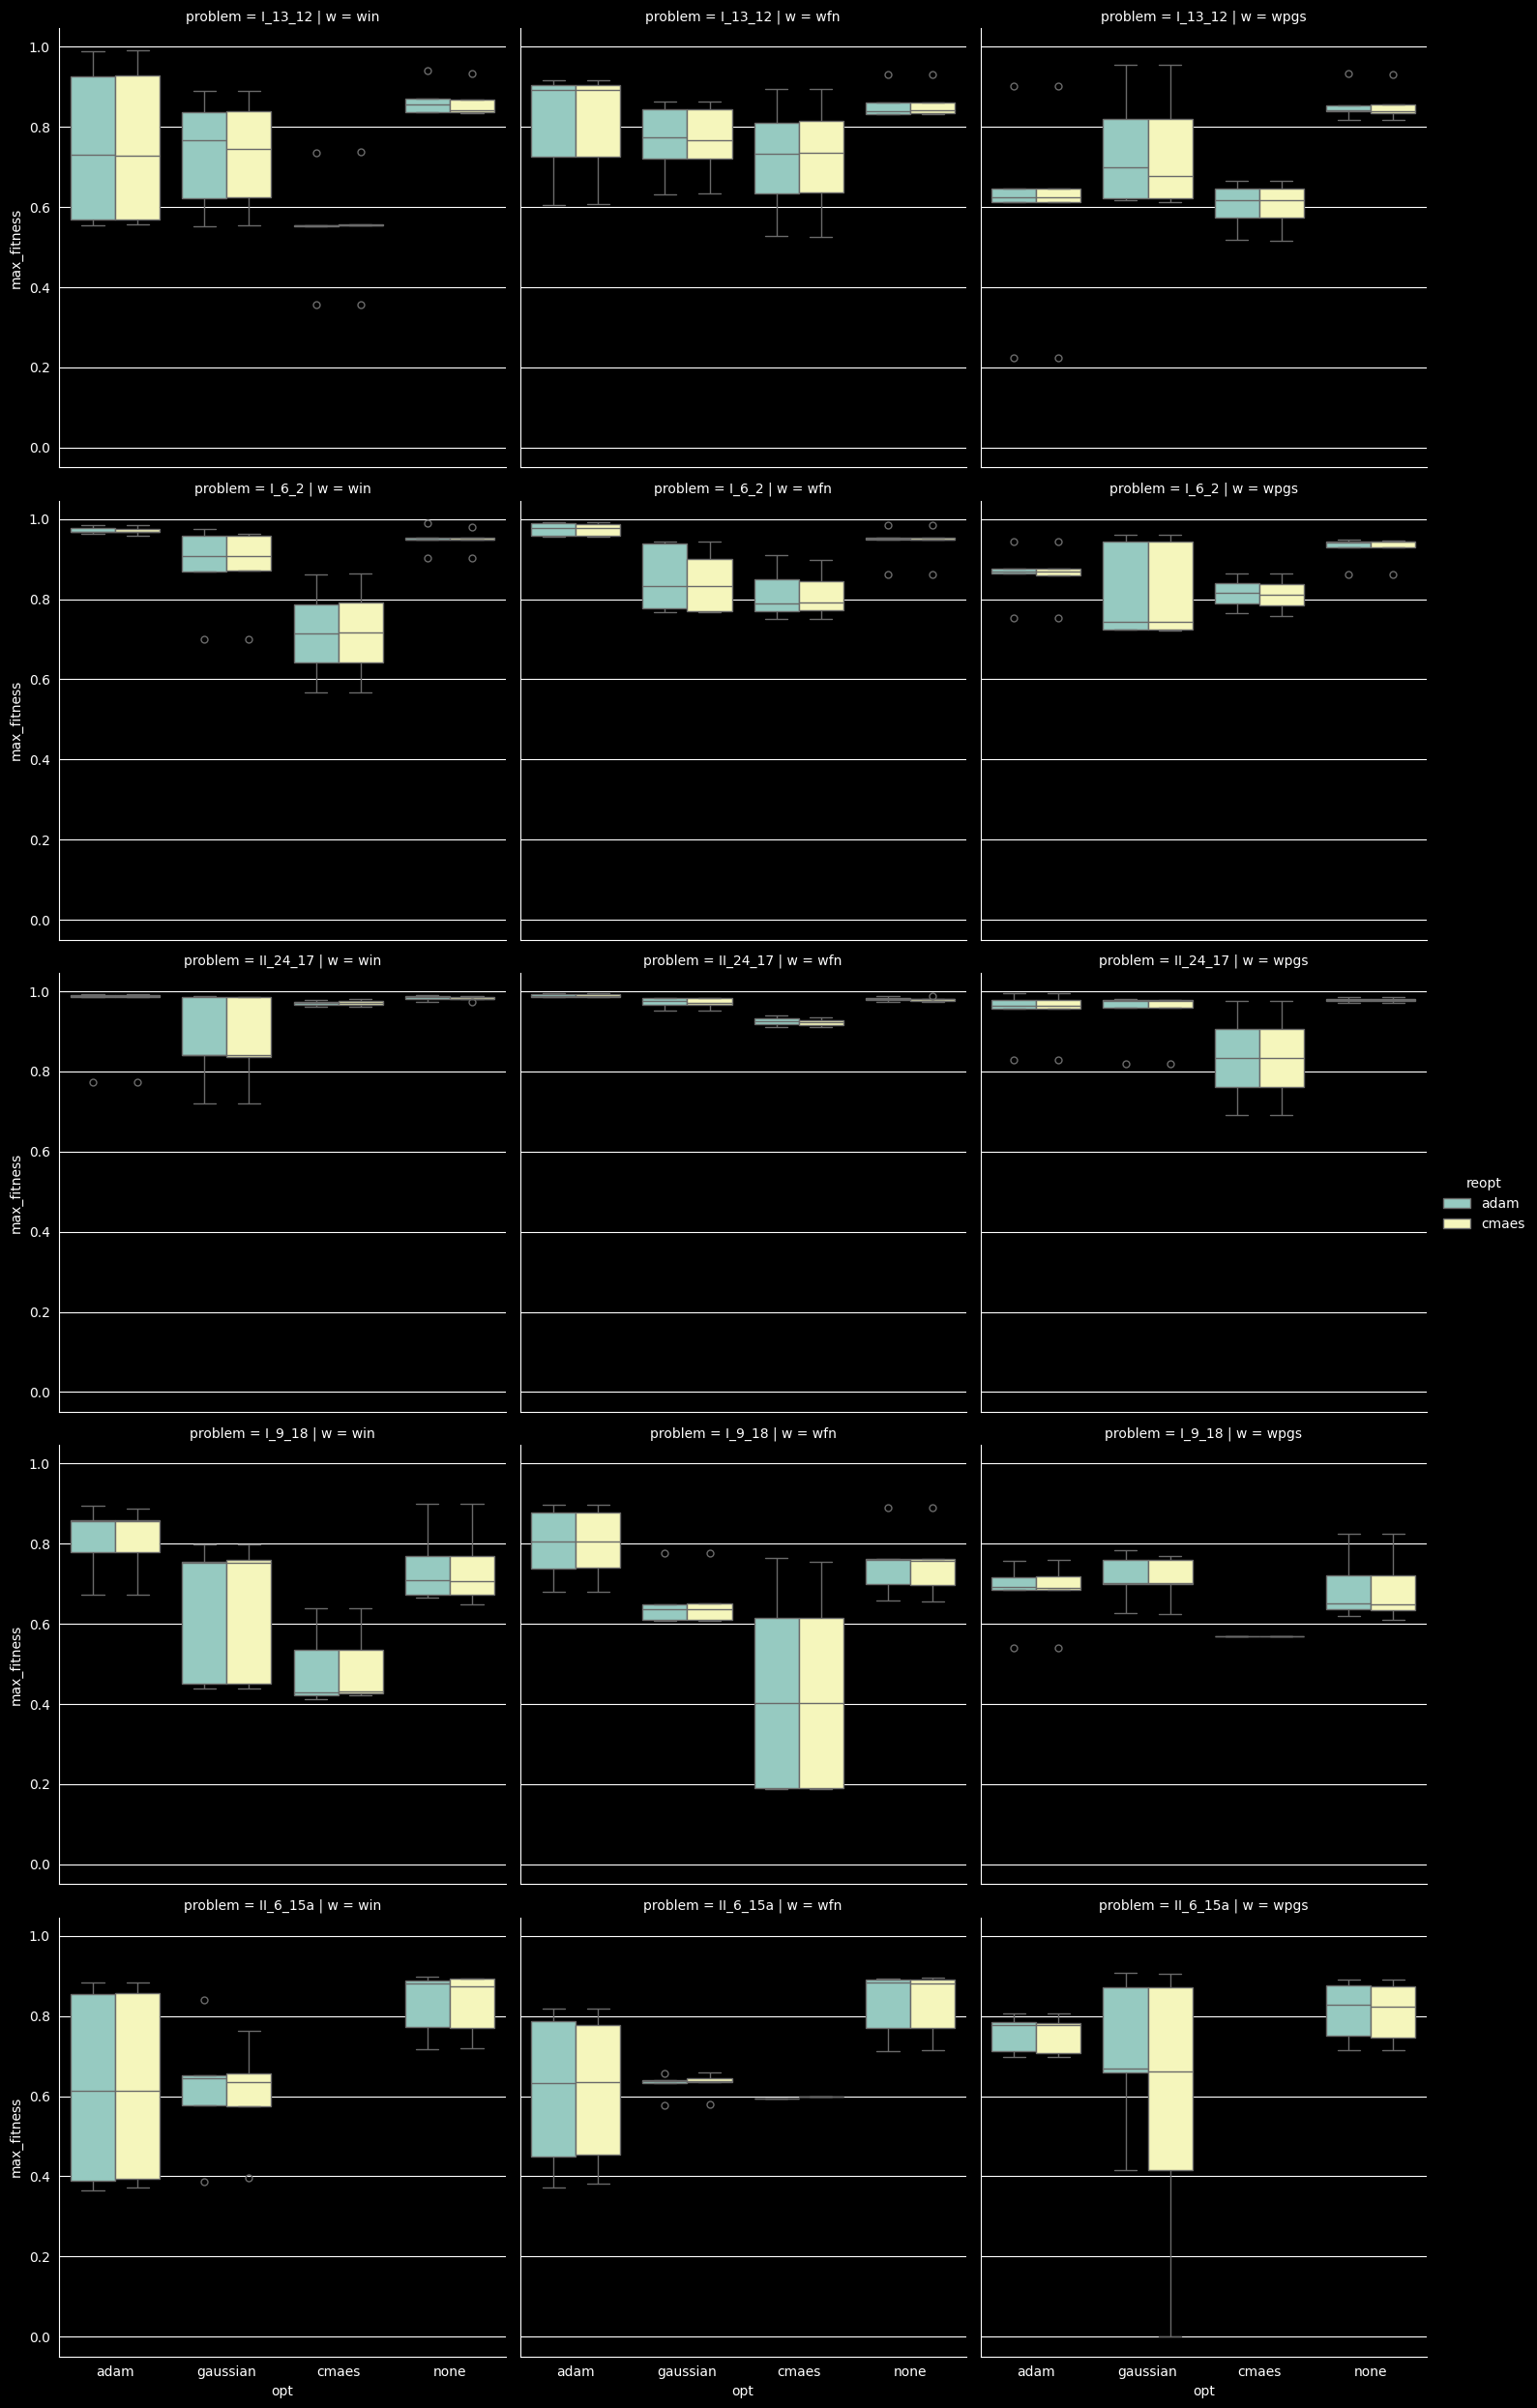

In [10]:
sns.catplot(x="opt", y="max_fitness", hue="reopt", data=reopt_df, col="w", row="problem", kind="box")
plt.show()

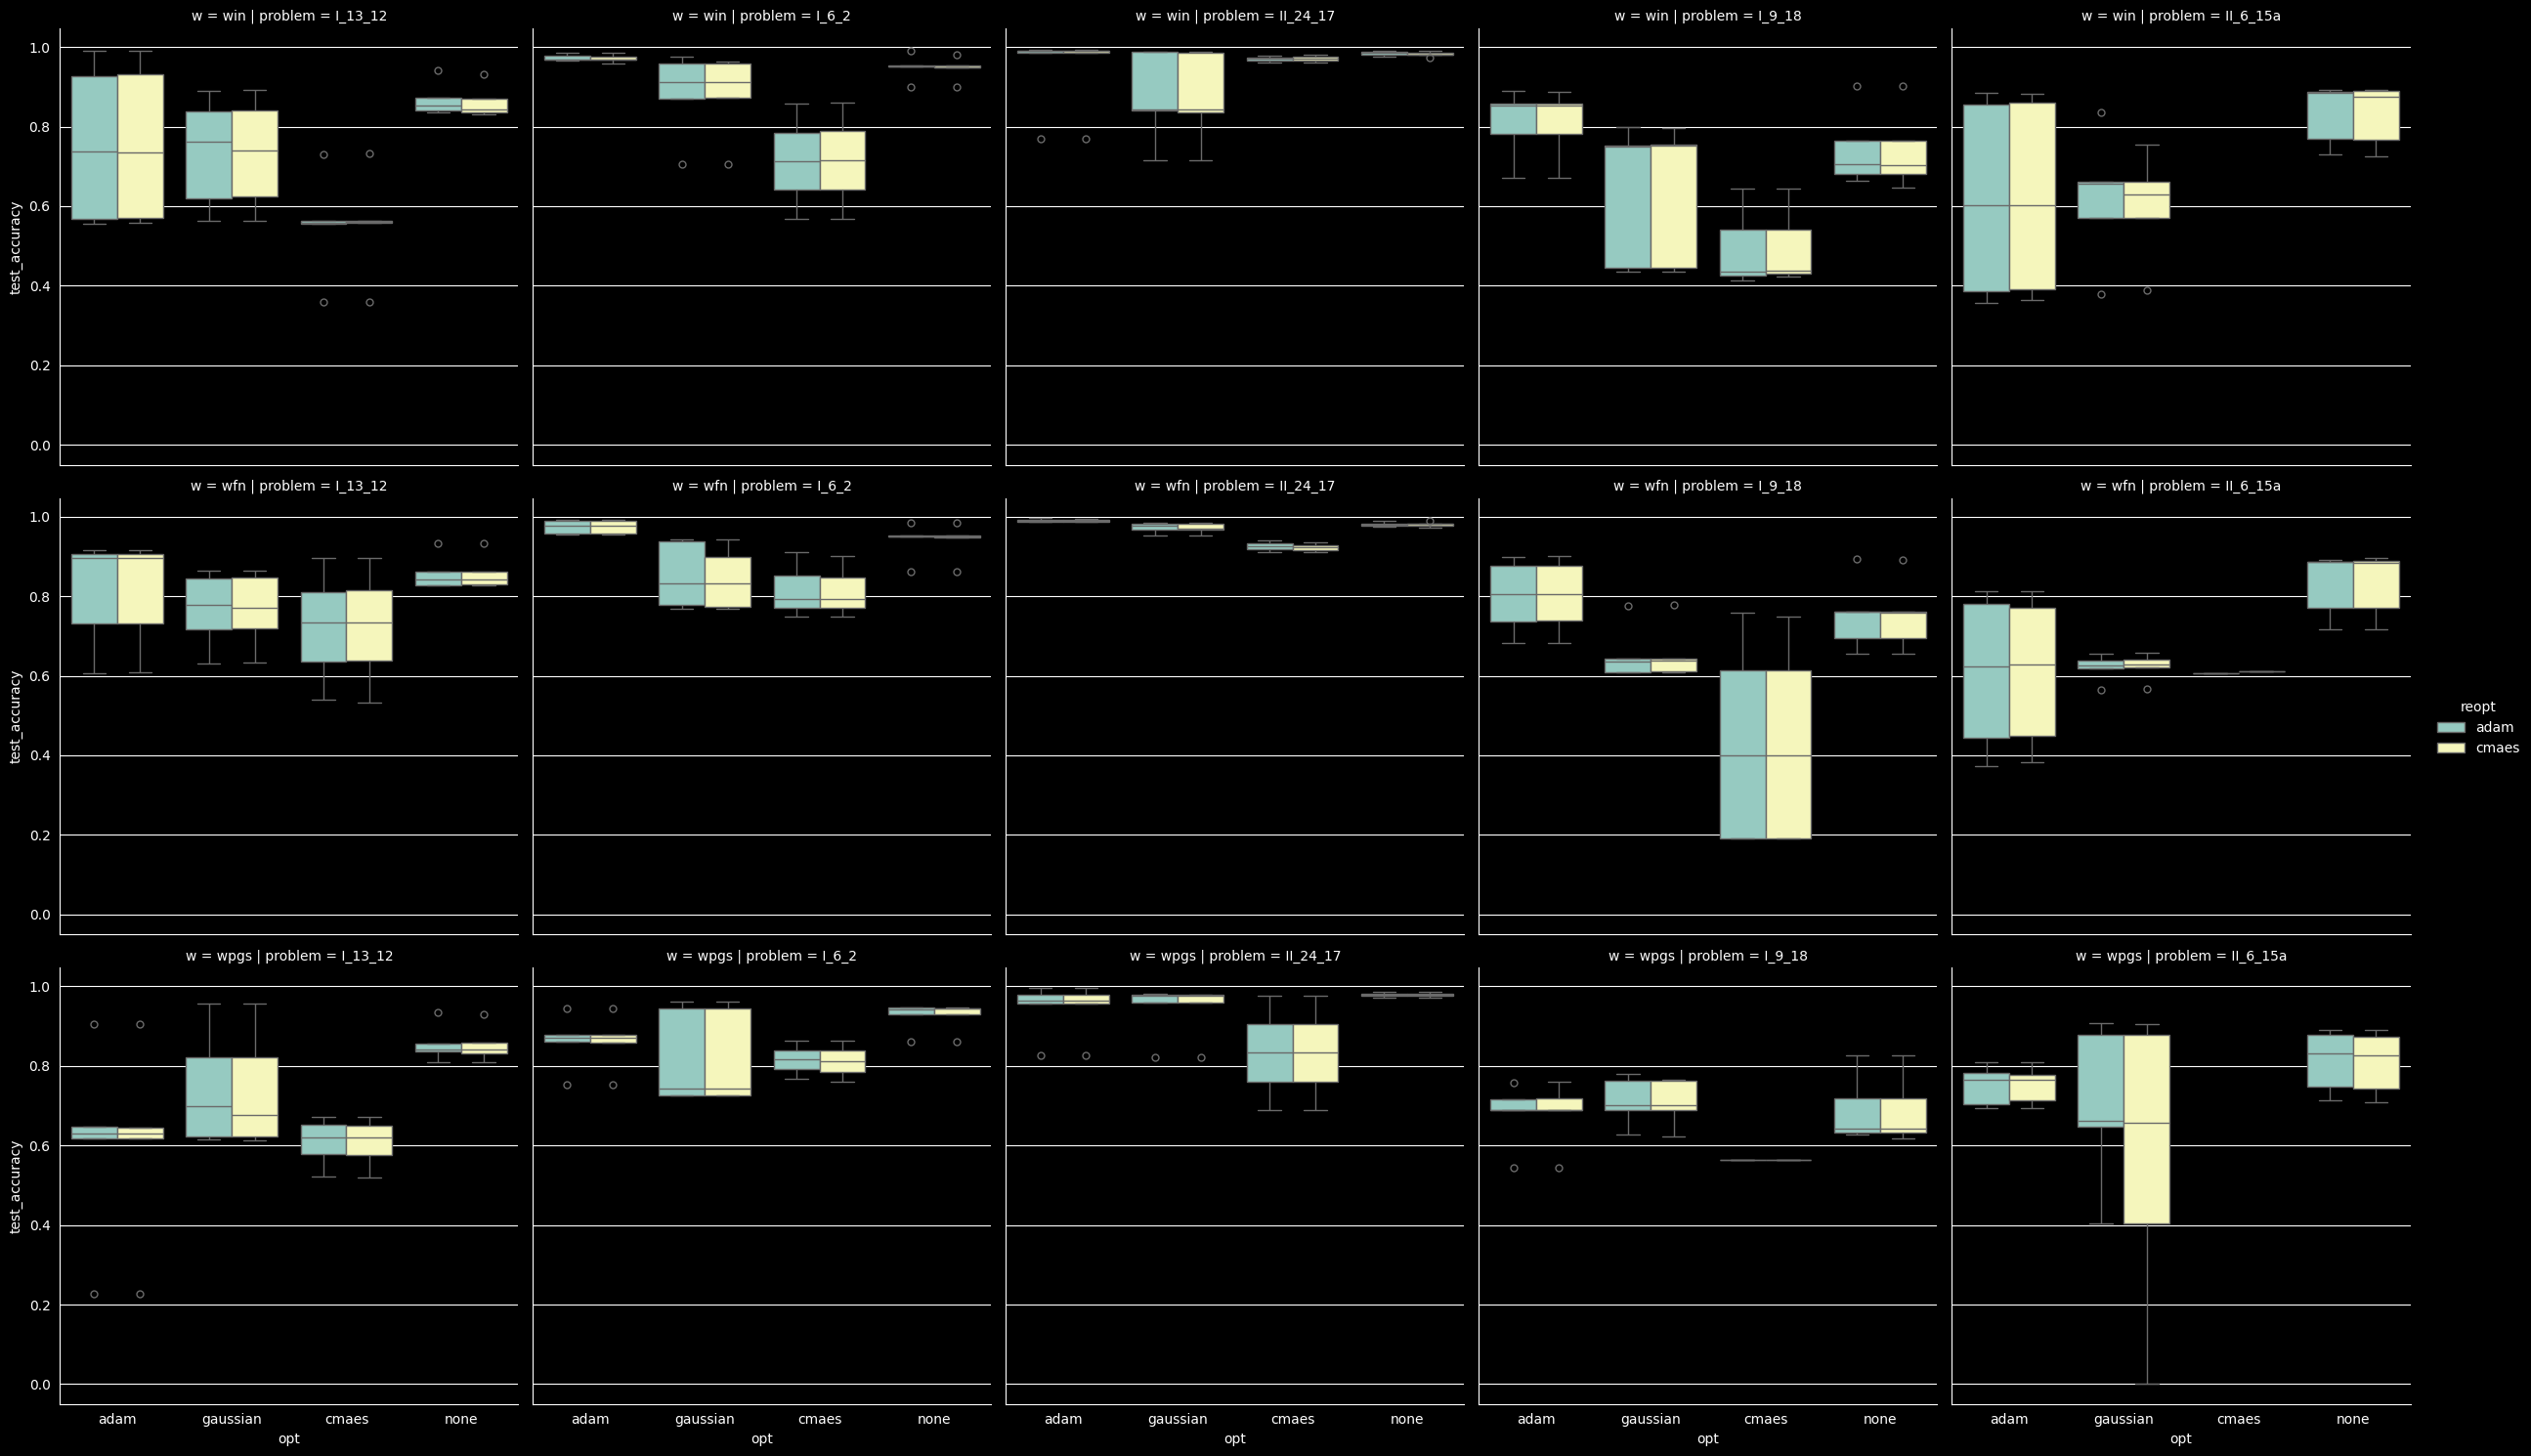

In [11]:
sns.catplot(x="opt", y="test_accuracy", hue="reopt", data=reopt_df, col="problem", row="w", kind="box")
plt.show()

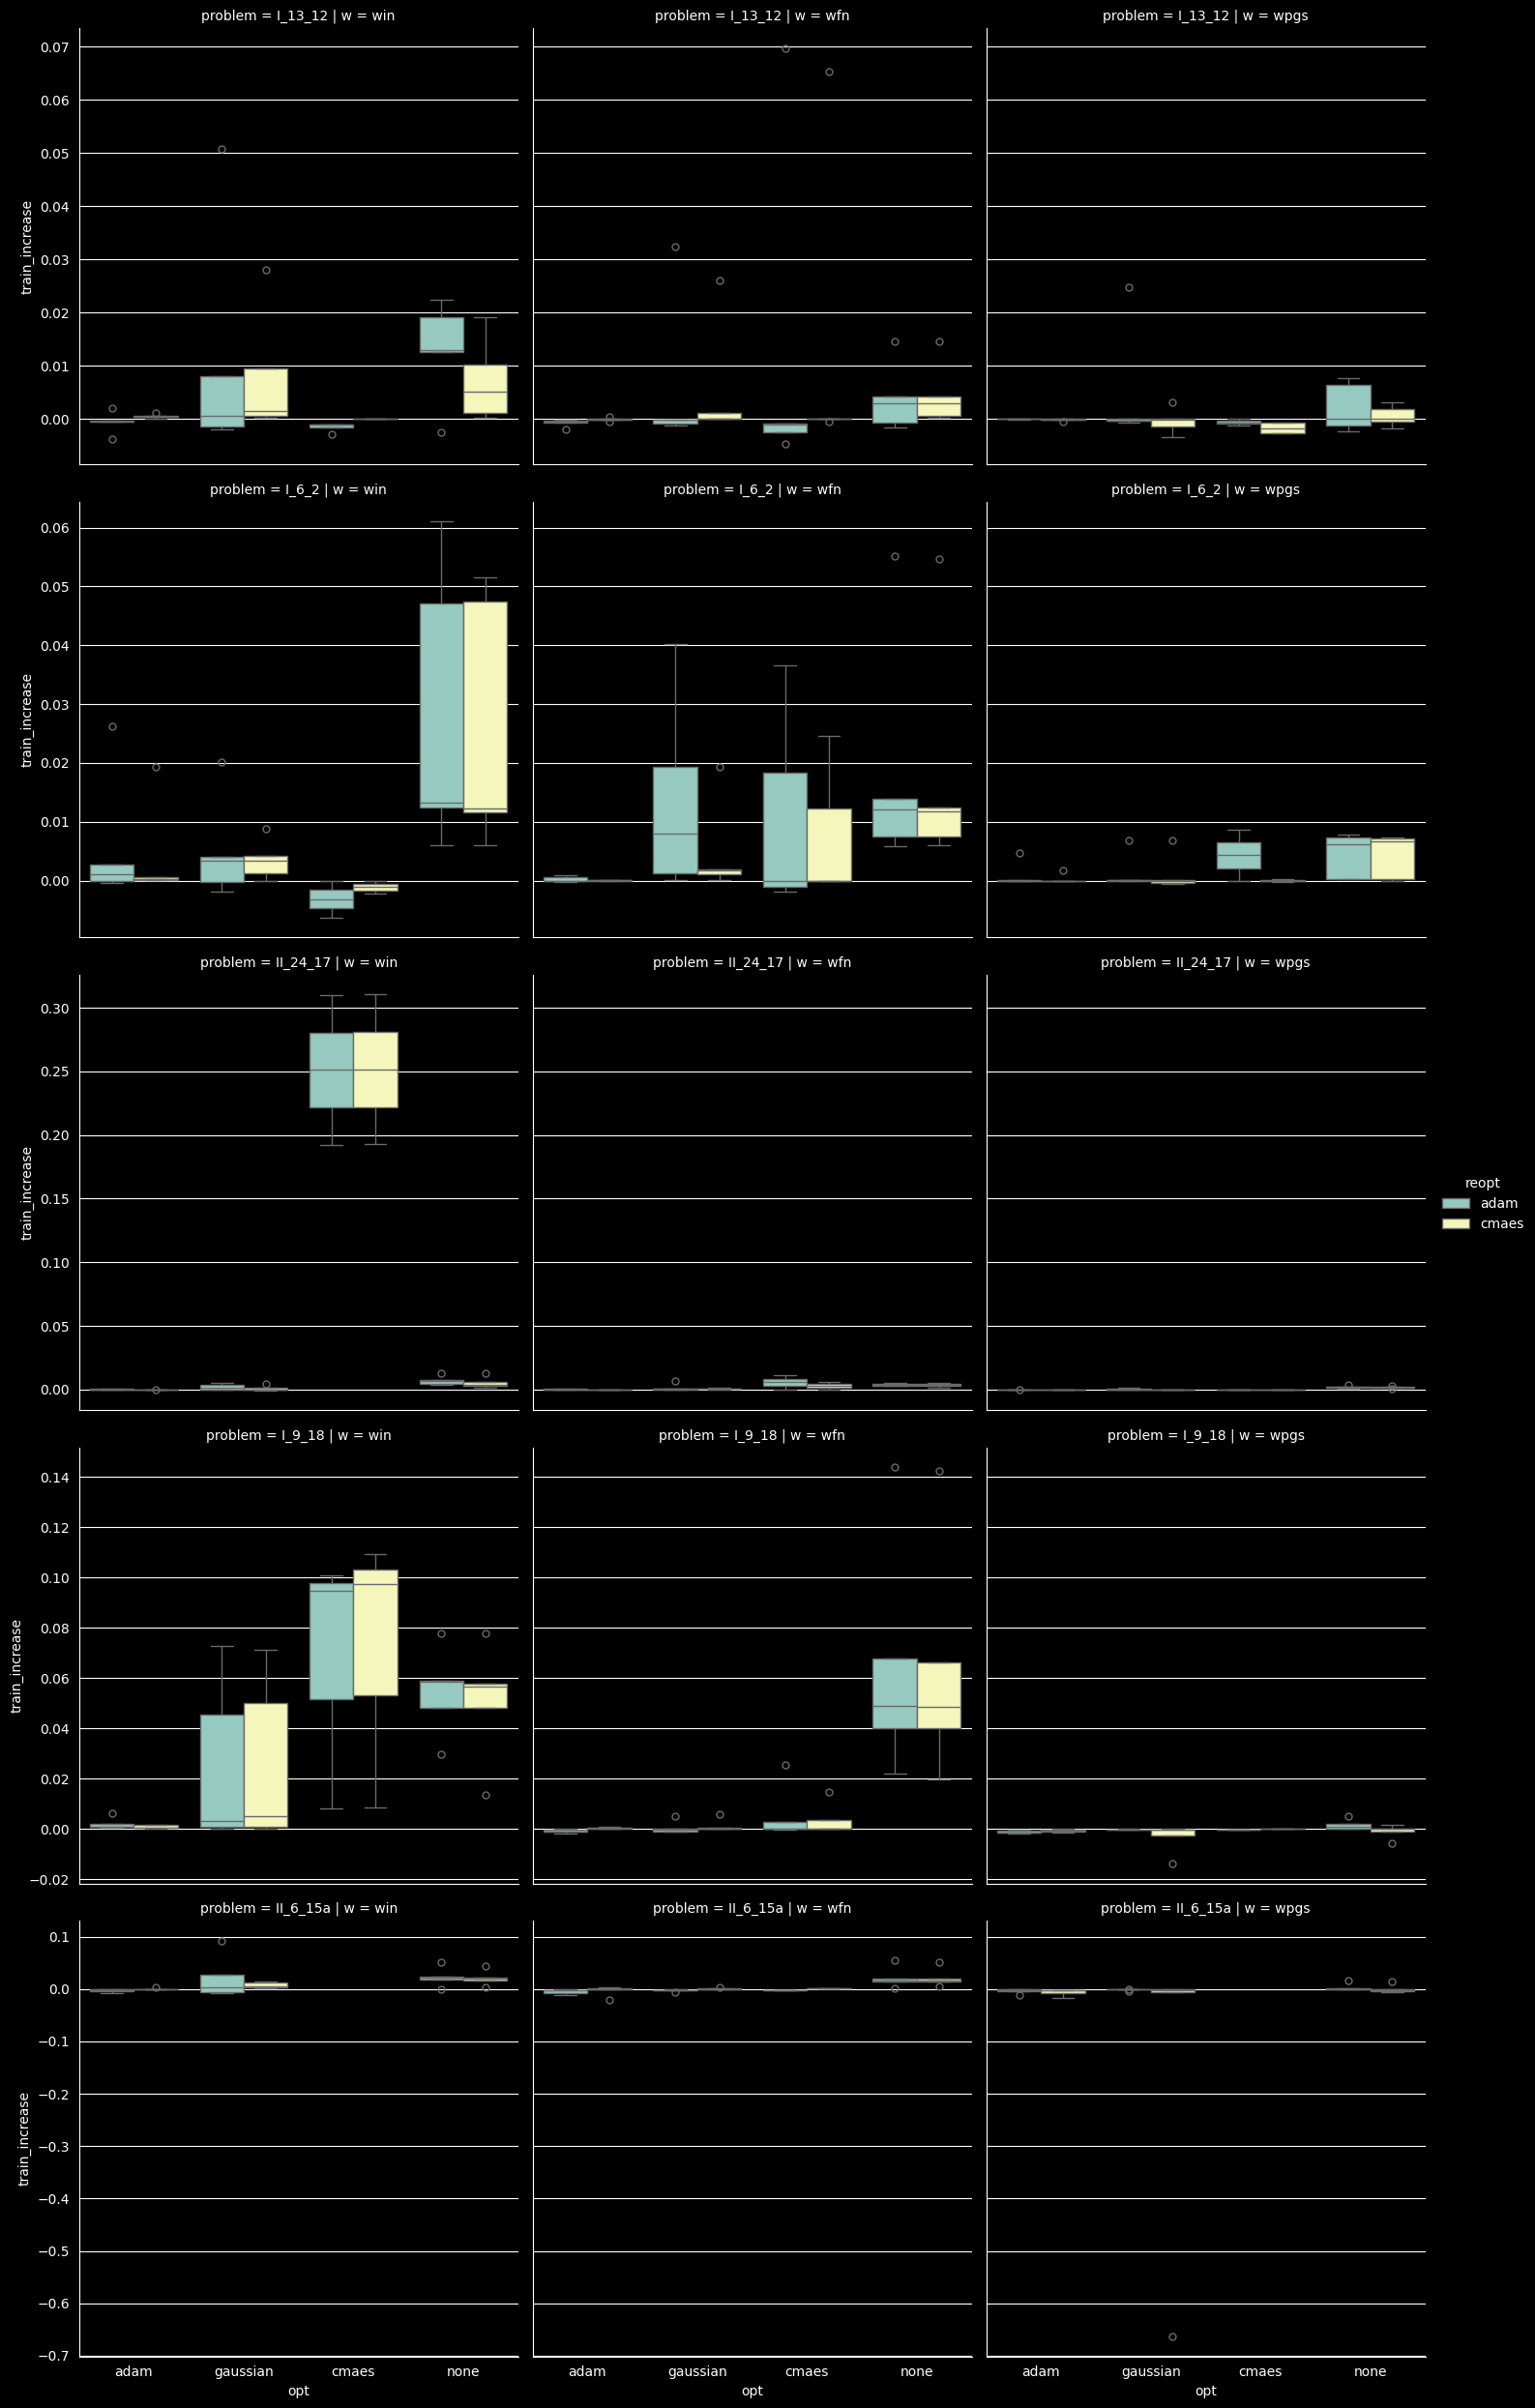

In [12]:
sns.catplot(x="opt", y="train_increase", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", sharey="row")
plt.show()

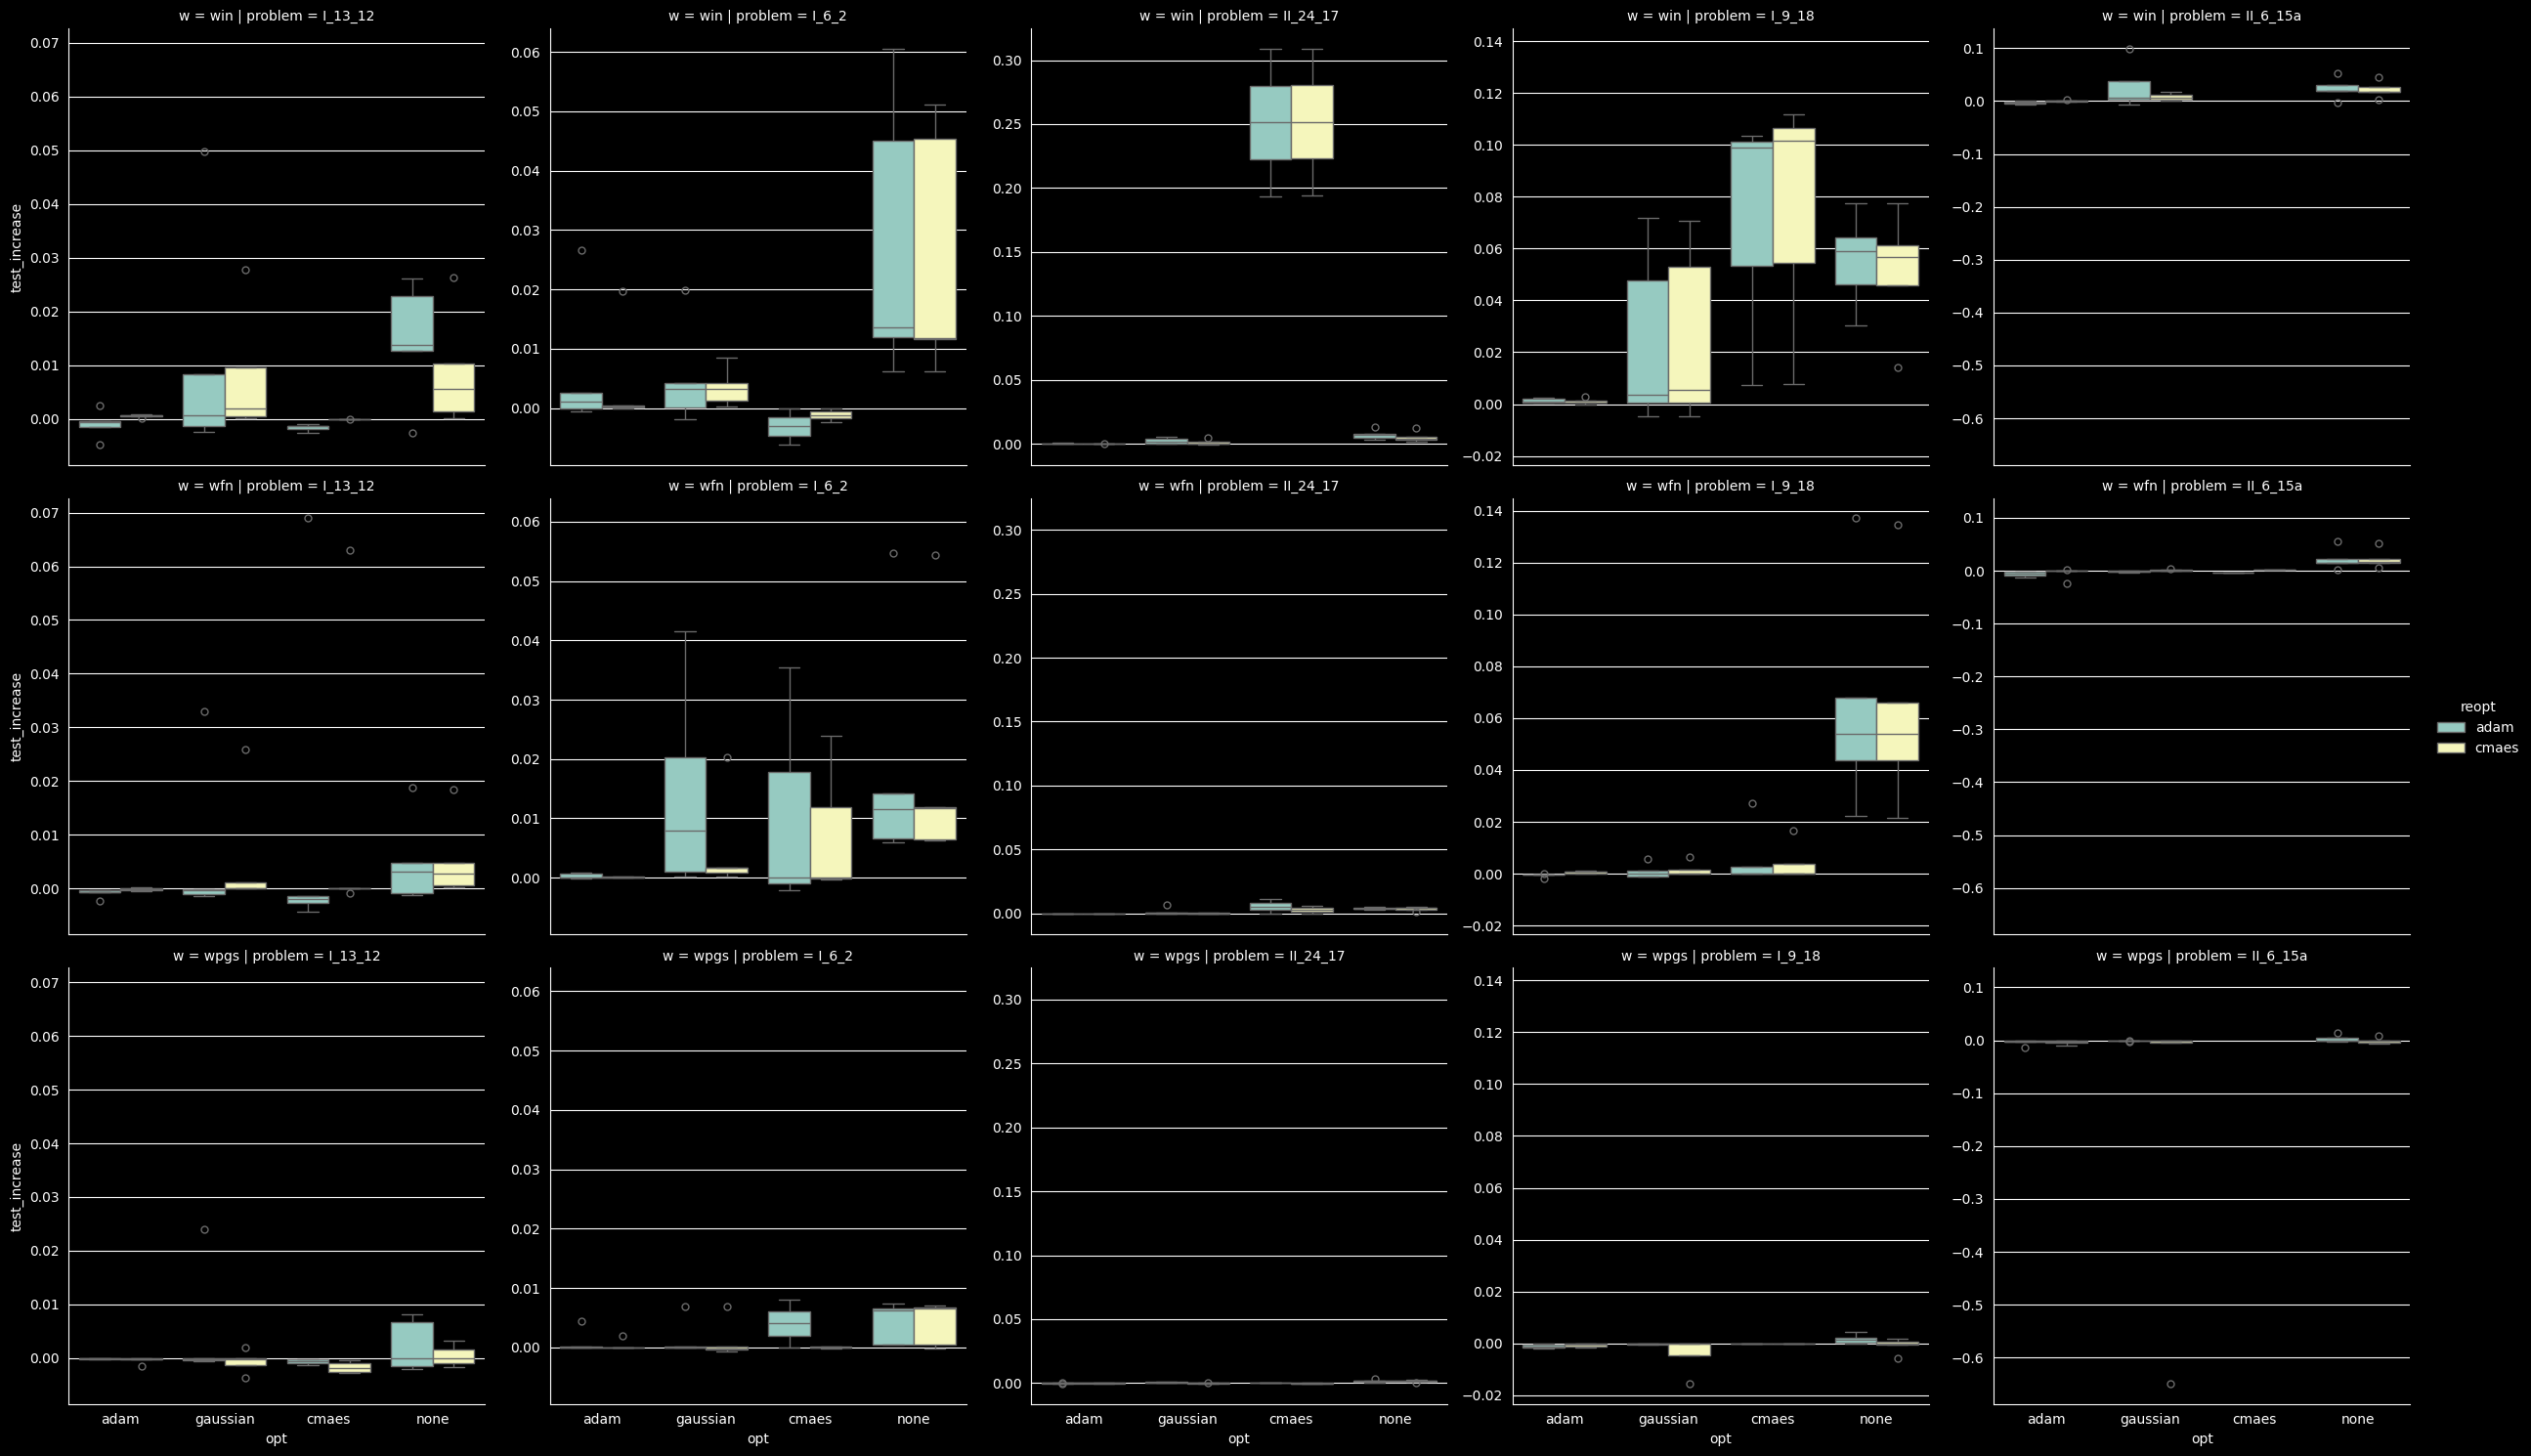

In [13]:
sns.catplot(x="opt", y="test_increase", hue="reopt", data=reopt_df, col="problem", row="w", kind="box", sharey="col")
plt.show()